<a href="https://colab.research.google.com/github/LilianYou/Sea_Hero_Quest/blob/main/Clustering_shared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Characterizing self-reported navigation ability using demographic information

### read data

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/My Drive/SHQ/Data/2019_cleaned_demographics_3121970.csv')

In [ ]:
df

,age,education,gender,hand,home_environment,navigating_skills,sleep,travel_time,nav_num
0,68.0,1,0,0,2,bad,8.0,0,1
1,21.0,1,0,0,1,good,7.0,1,2
2,36.0,1,1,0,0,very-good,5.0,1,3
3,19.0,0,1,0,1,good,8.0,0,2
4,61.0,1,1,0,1,good,7.0,0,2
...,...,...,...,...,...,...,...,...,...
771623,50.0,0,1,1,0,good,6.0,2,2
771624,68.0,1,1,0,2,good,8.0,1,2
771625,59.0,0,0,0,2,very-good,7.0,0,3
771626,48.0,1,1,0,1,good,6.0,2,2


In [ ]:
#df.head()
df = df.drop(['navigating_skills'], axis= 1)

In [ ]:
df

,age,education,gender,hand,home_environment,sleep,travel_time,nav_num
0,68.0,1,0,0,2,8.0,0,1
1,21.0,1,0,0,1,7.0,1,2
2,36.0,1,1,0,0,5.0,1,3
3,19.0,0,1,0,1,8.0,0,2
4,61.0,1,1,0,1,7.0,0,2
...,...,...,...,...,...,...,...,...
771623,50.0,0,1,1,0,6.0,2,2
771624,68.0,1,1,0,2,8.0,1,2
771625,59.0,0,0,0,2,7.0,0,3
771626,48.0,1,1,0,1,6.0,2,2


## Clustering


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import scale,RobustScaler,StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
#import mglearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# MinMax scaled
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df)
df2 = scaler.transform(df)
df2 = pd.DataFrame(df2,index=df.index,columns=['age',	'gender',	'hand',	'nav_num',	'sleep',	'education',	'travel_time',	'home_environment'])
# df2 = pd.DataFrame(df2,index=df.index,columns=['age',	'gender',	'hand',	'navigating_skills',	'sleep',	'edu_level',	'commute_level',	'home_env'])
df2[:10]

,age,gender,hand,nav_num,sleep,education,travel_time,home_environment
0,0.960784,1.0,0.0,0.0,1.0,0.555556,0.0,0.333333
1,0.039216,1.0,0.0,0.0,0.5,0.444444,0.5,0.666667
2,0.333333,1.0,1.0,0.0,0.0,0.222222,0.5,1.000000
3,0.000000,0.0,1.0,0.0,0.5,0.555556,0.0,0.666667
4,0.823529,1.0,1.0,0.0,0.5,0.444444,0.0,0.666667
5,0.196078,1.0,1.0,0.0,0.0,0.444444,1.0,1.000000
6,0.000000,1.0,0.0,0.0,0.5,0.555556,0.0,0.333333
7,0.372549,1.0,1.0,0.0,0.0,0.444444,0.0,0.666667
8,0.392157,1.0,1.0,0.0,1.0,0.333333,0.0,1.000000
9,0.490196,0.0,1.0,0.0,0.5,0.444444,0.5,0.666667


In [ ]:
df3 = df2.drop(columns="nav_num", axis=1)

In [ ]:
df3.head()

,age,gender,hand,sleep,education,travel_time,home_environment
0,0.960784,1.0,0.0,1.0,0.555556,0.0,0.333333
1,0.039216,1.0,0.0,0.5,0.444444,0.5,0.666667
2,0.333333,1.0,1.0,0.0,0.222222,0.5,1.000000
3,0.000000,0.0,1.0,0.5,0.555556,0.0,0.666667
4,0.823529,1.0,1.0,0.5,0.444444,0.0,0.666667


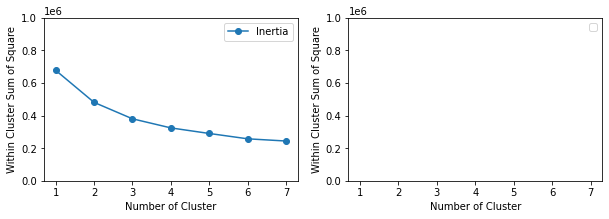

In [ ]:
results = dict()
k_cand = [1, 2,3,4,5,6,7] #

for k in k_cand:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df3)
    score0 = kmeans.inertia_
    #score1 = silhouette_score(df2,kmeans.labels_,metric='euclidean')
    #score2 = silhouette_score(df2,kmeans.labels_,metric='correlation')
    results[k] = {'k':kmeans,'s0':score0} #,'s1':score1,'s2':score2

fig,axs = plt.subplots(1,2,sharex=True,figsize=(10,3))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Inertia')
#axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Euclidean')
#axs[1].plot([i for i in results.keys()],[i['s2'] for i in results.values()],'o-',label='Correlation')
for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('Number of Cluster')
    ax.set_ylabel('Within Cluster Sum of Square')
    ax.set_ylim(0, 1000000)
    ax.legend()

In [ ]:
# Higher value of CH index means the clusters are dense and well separated, although there is no “acceptable” cut-off value. 
# We need to choose that solution which gives a peak or at least an abrupt elbow on the line plot of CH indices. On the other hand, 
# if the line is smooth (horizontal or ascending or descending) then there is no such reason to prefer one solution over others. 

# The Davies–Bouldin index (DBI) (introduced by David L. Davies and Donald W. Bouldin in 1979), a metric for evaluating clustering algorithms, 
# is an internal evaluation scheme, where the validation of how well the clustering has been done is made using quantities and features inherent to the dataset.
# Lower the DB index value, better is the clustering. It also has a drawback. A good value reported by this method does not imply the best information retrieval.

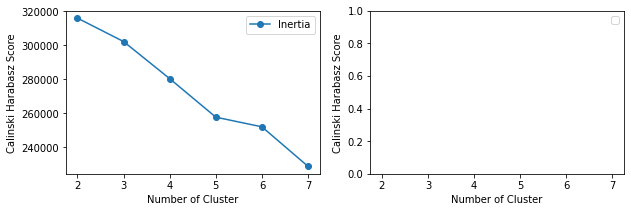

In [ ]:
results = dict()
k_cand = [ 2,3,4,5,6,7] #

for k in k_cand:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df3)
    labels = kmeans.labels_
    score0 = metrics.calinski_harabasz_score(df3, labels)
    #score1 = silhouette_score(df2,kmeans.labels_,metric='euclidean')
    #score2 = silhouette_score(df2,kmeans.labels_,metric='correlation')
    results[k] = {'k':kmeans,'s0':score0} #,'s1':score1,'s2':score2

fig,axs = plt.subplots(1,2,sharex=True,figsize=(10,3))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Inertia')
#axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Euclidean')
#axs[1].plot([i for i in results.keys()],[i['s2'] for i in results.values()],'o-',label='Correlation')
for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('Number of Cluster')
    ax.set_ylabel('Calinski Harabasz Score')
    ax.legend()    

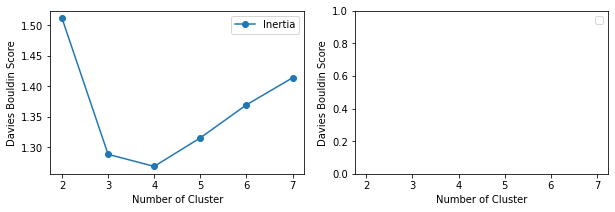

In [ ]:
results = dict()
k_cand = [ 2,3,4,5,6,7] #

for k in k_cand:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df3)
    labels = kmeans.labels_
    score0 = metrics.davies_bouldin_score(df3, labels)
    #score1 = silhouette_score(df2,kmeans.labels_,metric='euclidean')
    #score2 = silhouette_score(df2,kmeans.labels_,metric='correlation')
    results[k] = {'k':kmeans,'s0':score0} #,'s1':score1,'s2':score2

fig,axs = plt.subplots(1,2,sharex=True,figsize=(10,3))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Inertia')
#axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Euclidean')
#axs[1].plot([i for i in results.keys()],[i['s2'] for i in results.values()],'o-',label='Correlation')
for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('Number of Cluster')
    ax.set_ylabel('Davies Bouldin Score')
    ax.legend()

No handles with labels found to put in legend.


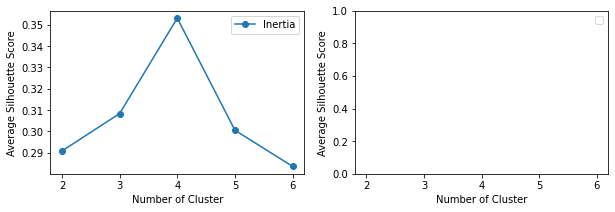

In [ ]:
results = dict()
k_cand = [ 2,3,4,5, 6] 
sil = [0.2907570615986244, 0.30833652748415463, 0.35319903869020247, 0.3005087485722123, 0.28350636635398946]

for k in k_cand:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df3)
    labels = kmeans.labels_
    score0 = sil[k-2]  #metrics.davies_bouldin_score(df3, labels)
    #score1 = silhouette_score(df2,kmeans.labels_,metric='euclidean')
    #score2 = silhouette_score(df2,kmeans.labels_,metric='correlation')
    results[k] = {'k':kmeans,'s0':score0} #,'s1':score1,'s2':score2

fig,axs = plt.subplots(1,2,sharex=True,figsize=(10,3))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Inertia')
#axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Euclidean')
#axs[1].plot([i for i in results.keys()],[i['s2'] for i in results.values()],'o-',label='Correlation')
for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('Number of Cluster')
    ax.set_ylabel('Average Silhouette Score')
    ax.legend()

In [ ]:
# siloutte. Basically, in this visualization as depicted above, each color represents a cluster, 
# its thickness denotes the cluster size. The red dotted line represents the average silhouette coefficient. 
# For a good cluster, silhouette coefficient will be close to 1 and similar in size compared to other clusters.

# The value of the Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated 
# than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary 
# of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.



For n_clusters = 2 The average silhouette_score is : 0.2907570615986244


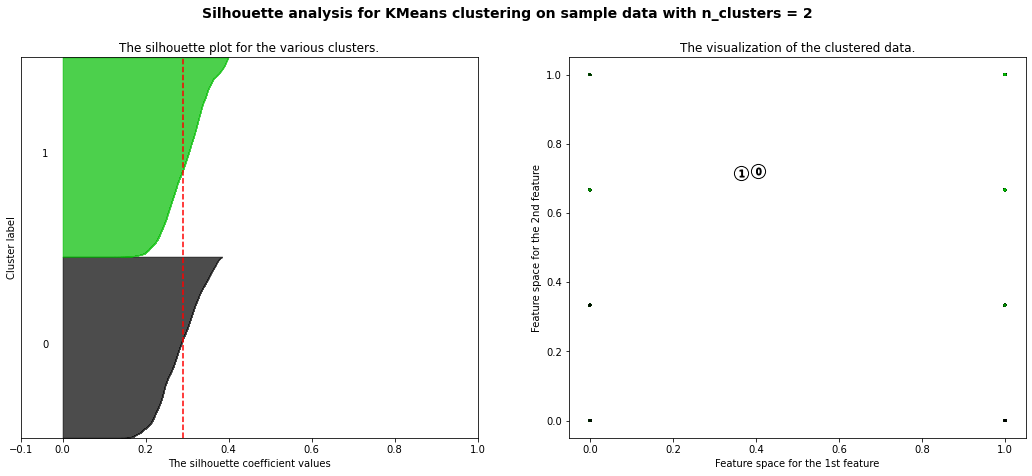

In [ ]:
range_n_clusters = [2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df3) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df3)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df3["gender"], df3["home_environment"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# average score = 0.2907570615986244

In [ ]:
range_n_clusters = [3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df3) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df3)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df3["gender"], df3["home_environment"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# For n_clusters = 3 The average silhouette_score is : 0.30833652748415463


For n_clusters = 3 The average silhouette_score is : 0.30833652748415463


For n_clusters = 4 The average silhouette_score is : 0.35319903869020247


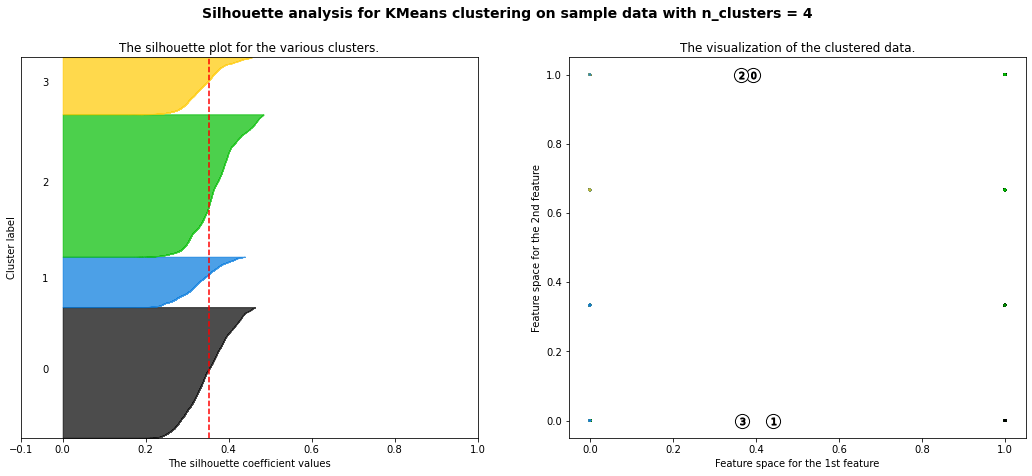

In [ ]:
range_n_clusters = [4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df3) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df3)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df3["gender"], df3["home_environment"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# For n_clusters = 4 The average silhouette_score is : 0.35319903869020247


For n_clusters = 5 The average silhouette_score is : 0.3005087485722123


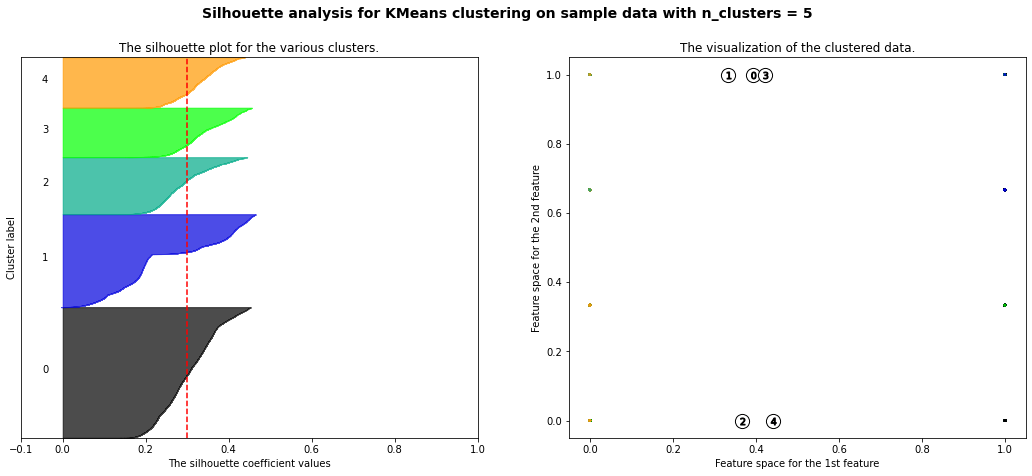

In [ ]:
range_n_clusters = [5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df3) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df3)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df3["gender"], df3["home_environment"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# For n_clusters = 5 The average silhouette_score is : 0.3005087485722123


For n_clusters = 6 The average silhouette_score is : 0.28350636635398946


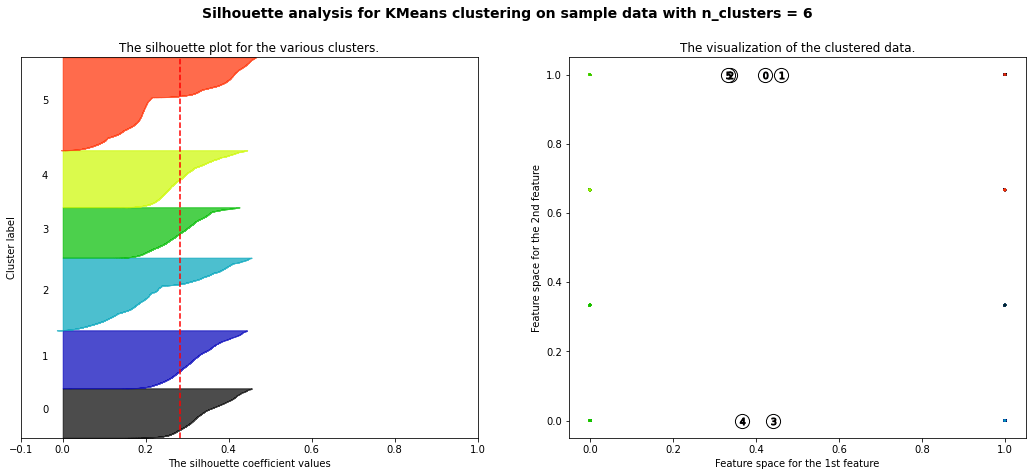

In [ ]:
range_n_clusters = [6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df3) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df3)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df3["gender"], df3["home_environment"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

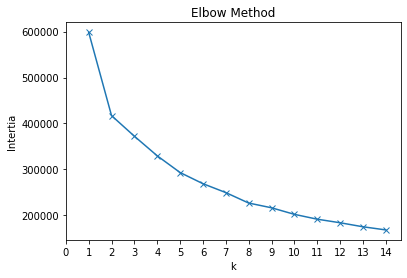

In [ ]:
intertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df3)
    intertia.append(km.inertia_)
plt.plot(K, intertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

the point before a roughly linear decrease in Inertia — which in this case is k = 2.

In [ ]:
df2 = df3.copy()

In [ ]:
km = KMeans(n_clusters= 4, n_init = 2, init = "random", random_state = 42)
%time km.fit(df2)
y_kmeans = km.predict(df2)
y_kmeans

CPU times: user 1.64 s, sys: 12.8 ms, total: 1.65 s
Wall time: 966 ms


array([1, 1, 2, ..., 3, 0, 0], dtype=int32)

In [ ]:
df2['cluster'] = y_kmeans
df2.head()

,age,gender,hand,sleep,education,travel_time,home_environment,cluster
0,0.960784,1.0,0.0,1.0,0.555556,0.0,0.333333,1
1,0.039216,1.0,0.0,0.5,0.444444,0.5,0.666667,1
2,0.333333,1.0,1.0,0.0,0.222222,0.5,1.000000,2
3,0.000000,0.0,1.0,0.5,0.555556,0.0,0.666667,3
4,0.823529,1.0,1.0,0.5,0.444444,0.0,0.666667,2


In [ ]:
df['cluster'] = y_kmeans
df

,age,education,gender,hand,home_environment,sleep,travel_time,nav_num,cluster
0,68.0,1,0,0,2,8.0,0,1,1
1,21.0,1,0,0,1,7.0,1,2,1
2,36.0,1,1,0,0,5.0,1,3,2
3,19.0,0,1,0,1,8.0,0,2,3
4,61.0,1,1,0,1,7.0,0,2,2
...,...,...,...,...,...,...,...,...,...
771623,50.0,0,1,1,0,6.0,2,2,0
771624,68.0,1,1,0,2,8.0,1,2,2
771625,59.0,0,0,0,2,7.0,0,3,3
771626,48.0,1,1,0,1,6.0,2,2,0


In [ ]:
## change cluster
cluster_map = {0: "group1", 1: "group2", 2: "group3", 3:"group4"}

df['cluster'] = df['cluster'].replace(cluster_map)

df


,age,education,gender,hand,home_environment,sleep,travel_time,nav_num,cluster
0,68.0,1,0,0,2,8.0,0,1,group2
1,21.0,1,0,0,1,7.0,1,2,group2
2,36.0,1,1,0,0,5.0,1,3,group3
3,19.0,0,1,0,1,8.0,0,2,group4
4,61.0,1,1,0,1,7.0,0,2,group3
...,...,...,...,...,...,...,...,...,...
771623,50.0,0,1,1,0,6.0,2,2,group1
771624,68.0,1,1,0,2,8.0,1,2,group3
771625,59.0,0,0,0,2,7.0,0,3,group4
771626,48.0,1,1,0,1,6.0,2,2,group1


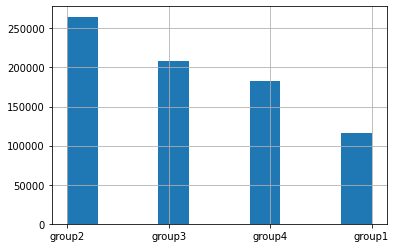

In [ ]:
df.cluster.hist()

In [ ]:
#df.to_csv('/content/drive/My Drive/SHQ/Data/2019_cleaned_demographics_with_cluster_3121970.csv', index=False)

# Visualization

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns


In [ ]:
df2_1 = df[df['cluster']  == "group1"]


#df2_1 = df2_1.drop(["cluster", "navigating_skills"], axis=1)
df2_1

,age,education,gender,hand,home_environment,sleep,travel_time,nav_num,cluster
5,29.0,1,1,0,0,7.0,2,3,group1
11,19.0,1,1,1,2,7.0,2,2,group1
12,20.0,1,1,0,2,6.0,2,2,group1
15,29.0,1,1,0,1,7.0,2,3,group1
17,27.0,1,1,0,0,6.0,2,3,group1
...,...,...,...,...,...,...,...,...,...
771613,32.0,1,1,0,1,6.0,2,3,group1
771619,19.0,1,1,0,2,9.0,2,3,group1
771623,50.0,0,1,1,0,6.0,2,2,group1
771626,48.0,1,1,0,1,6.0,2,2,group1


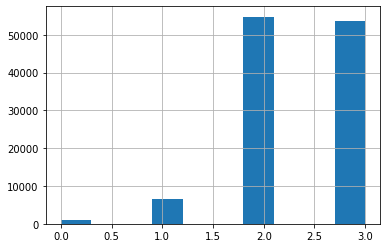

In [ ]:
df2_1['nav_num'].hist()

In [ ]:
df2_2 = df[df['cluster']  == "group2"]

#df2_2 = df2_2.drop(["cluster", "navigating_skills"], axis=1)
df2_2

,age,education,gender,hand,home_environment,sleep,travel_time,nav_num,cluster
0,68.0,1,0,0,2,8.0,0,1,group2
1,21.0,1,0,0,1,7.0,1,2,group2
6,19.0,1,0,0,1,8.0,0,1,group2
19,24.0,1,0,0,2,8.0,2,2,group2
20,50.0,1,0,0,0,6.0,1,1,group2
...,...,...,...,...,...,...,...,...,...
771598,21.0,1,0,1,2,7.0,0,2,group2
771602,20.0,1,0,0,2,8.0,2,2,group2
771604,56.0,1,0,0,0,7.0,0,3,group2
771608,52.0,1,0,0,1,7.0,2,2,group2


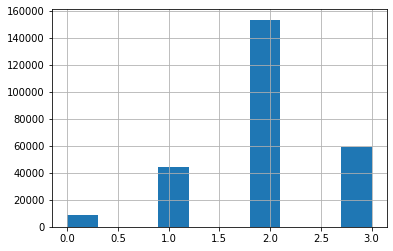

In [ ]:
df2_2['nav_num'].hist()

In [ ]:
df2_3 = df[df['cluster']  == "group3"]

#df2_3 = df2_3.drop(["cluster", "navigating_skills"], axis=1)
df2_3

,age,education,gender,hand,home_environment,sleep,travel_time,nav_num,cluster
2,36.0,1,1,0,0,5.0,1,3,group3
4,61.0,1,1,0,1,7.0,0,2,group3
7,38.0,1,1,0,0,7.0,0,2,group3
8,39.0,1,1,0,2,6.0,0,3,group3
13,38.0,1,1,0,1,7.0,0,3,group3
...,...,...,...,...,...,...,...,...,...
771614,60.0,1,1,1,0,6.0,0,3,group3
771616,30.0,1,1,0,1,7.0,0,3,group3
771620,33.0,1,1,0,0,8.0,0,1,group3
771622,23.0,1,1,0,0,6.0,1,2,group3


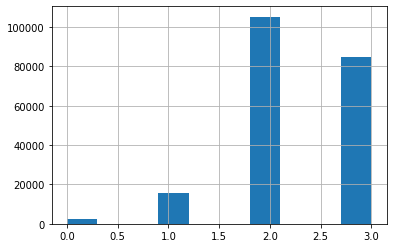

In [ ]:
df2_3['nav_num'].hist()

In [ ]:
df2_4 = df[df['cluster']  == "group4"]

#df2_4 = df2_4.drop(["cluster", "navigating_skills"], axis=1)
df2_4.head()

,age,education,gender,hand,home_environment,sleep,travel_time,nav_num,cluster
3,19.0,0,1,0,1,8.0,0,2,group4
9,44.0,0,1,0,1,7.0,1,2,group4
10,47.0,0,1,1,1,7.0,1,2,group4
18,23.0,0,0,0,2,8.0,1,3,group4
27,20.0,0,0,0,1,10.0,0,1,group4


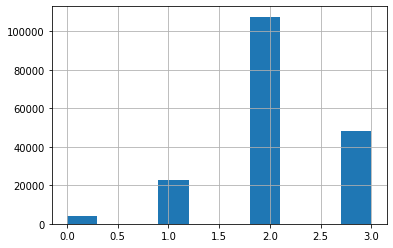

In [ ]:
df2_4['nav_num'].hist()

In [ ]:
len(df2_1) + len(df2_2) + len(df2_3) + len(df2_4)

771628

In [ ]:
import matplotlib.patches as mpatches


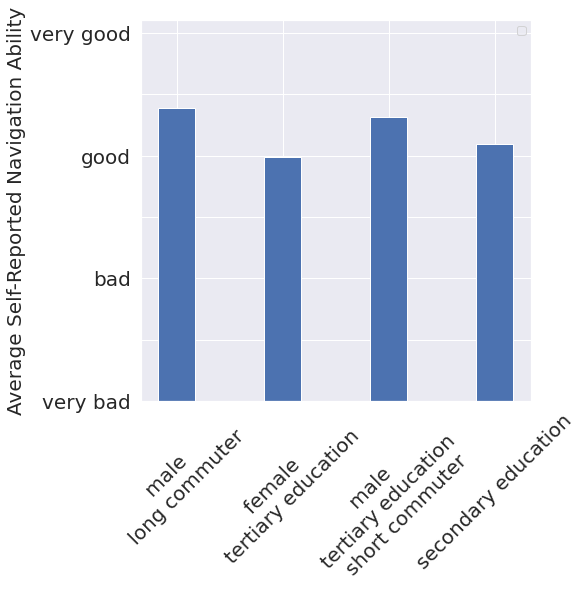

In [ ]:
#labels = ['male \n long \n commuter', 'female \n tertiary', 'male \n tertiary \n short \n commuter', 'secondary \n education']
means = [df2_1['nav_num'].mean(), df2_2['nav_num'].mean(), df2_3['nav_num'].mean(), df2_4['nav_num'].mean()]
stds = [df2_1['nav_num'].std()/len(df2_1), df2_2['nav_num'].std()/len(df2_2), df2_3['nav_num'].std()/len(df2_3), df2_3['nav_num'].std()/len(df2_4)]
title = 'group_by_mean'
#men_std = [2, 3, 4, 1]
#women_std = [3, 5, 2, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

# fig, ax = plt.subplots()
plt.figure(figsize=(7, 7))

ax = plt.gca()

# plt.figure(figsize=(10, 10))

# ax.set_xlabel(None)
ax.set_xticklabels(['male \n long commuter', 'female \n tertiary education', 'male \n tertiary education \n short commuter', 'secondary education'], rotation = 45)

#ax.set_xticklabels(['male \n long \n commuter', 'female \n tertiary', 'male \n tertiary \n short \n commuter', 'secondary \n education'], rotation = 0)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_ylabel('Average Self-Reported Navigation Ability', fontsize=20)
ax.set_ylim(0, 3.1)
# ax.set_ylabel(None)
ax.set_yticklabels(['very bad', '', 'bad', '', 'good', '', 'very good'], rotation = 0)

ax.bar(labels, means, width,  yerr=stds
      )

# ax.set_ylabel('Mean (Standard Deviation)')
# ax.set_title('Self-Reported Navigation Skills by Group')
ax.legend()

plt.savefig(title + '.pdf', bbox_inches="tight")
plt.savefig(title + '.png', bbox_inches="tight")

plt.show()

<Figure size 720x720 with 0 Axes>

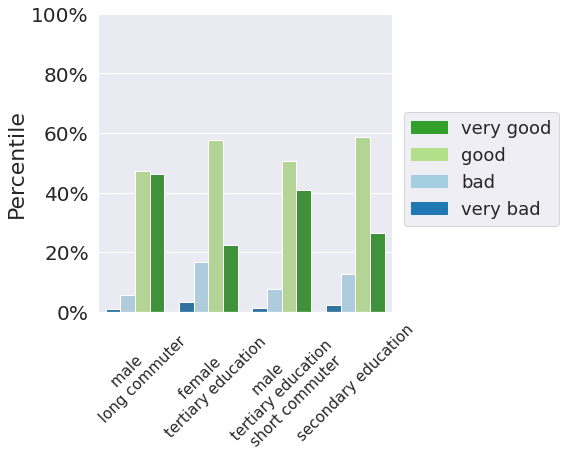

In [ ]:
import matplotlib.ticker as mtick

title = 'group_by_percent'

sns.set(color_codes=True)

plt.figure(figsize=(10, 10))

x,y = 'cluster', 'nav_num'
#color = sns.color_palette("flare", n_colors=4)
color = [sns.color_palette("Paired", n_colors=4)[1], sns.color_palette("Paired", n_colors=4)[0], sns.color_palette("Paired", n_colors=4)[2], sns.color_palette("Paired", n_colors=4)[3]]

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue= y, kind='bar', palette=color, legend = None))

ax = plt.gca()


ax.set_xlabel(None)
ax.set_xticklabels(['male \n long commuter', 'female \n tertiary education', 'male \n tertiary education \n short commuter', 'secondary education'], rotation = 45)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_ylabel('Percentile', fontsize=22)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
ax.set_yticks(np.arange(0,101,20))
#
# add legend
top_bar = mpatches.Patch(color= sns.color_palette("Paired", n_colors=4)[3], label='very good')
second_bar = mpatches.Patch(color= sns.color_palette("Paired", n_colors=4)[2], label='good')
third_bar = mpatches.Patch(color= sns.color_palette("Paired", n_colors=4)[0], label='bad')
bottom_bar = mpatches.Patch(color=sns.color_palette("Paired", n_colors=4)[1], label='very bad')
plt.legend(handles=[top_bar, second_bar, third_bar, bottom_bar],loc='upper right', prop={'size': 18}, bbox_to_anchor=(1.6, 0.7)) # set location bbox_to_anchor=(4, 0.5)

plt.savefig(title + '.pdf', bbox_inches="tight")
plt.savefig(title + '.png', bbox_inches="tight")


In [ ]:
## Qualitatively, 1) for males, the proportion of report very good at navigation skills decreased with the education level; 
## for all the other levels of navigation skills (including good, bad, very bad), the proportion of report increased with the education level;
## 2) for females, the proportion of report very good at navigation skills increased with the education level; 
## for all the other levels of navigation skills (including good, bad, very bad), the proportion of report decreased with the education level.



In [ ]:
df_model = df.copy()

skill_map = {0:"very bad", 1:"bad", 2:"good", 3:"very good"}
df_model['nav_num'] = df_model['nav_num'].replace(skill_map)


In [ ]:
myCrosstable = pd.crosstab(df_model['cluster'], df_model['nav_num'])
myCrosstable

nav_num,bad,good,very bad,very good
cluster,,,,
group1,6626,54794,1010,53592
group2,44129,153192,8574,59061
group3,15457,105254,2198,84819
group4,22800,107551,4198,48373


In [ ]:
# !pip install scipy

from scipy.stats import chi2_contingency

chiVal, pVal, df, exp = chi2_contingency(myCrosstable)
chiVal, pVal, df, exp

(41069.5070743028,
 0.0,
 9,
 array([[ 13383.84592576,  63270.14235098,   2402.75308828,
          36965.25863499],
        [ 30564.29195415, 144488.14739227,   5487.09595816,
          84416.46469542],
        [ 23962.69282089, 113280.06869631,   4301.93492201,
          66183.30356078],
        [ 21101.1692992 ,  99752.64156044,   3788.21603156,
          58279.9731088 ]]))

In [ ]:
colTotals = myCrosstable.sum()
nCols = len(colTotals)

nCols, colTotals

(4, nav_num
 bad           89012
 good         420791
 very bad      15980
 very good    245845
 dtype: int64)

In [ ]:
rowTotals = myCrosstable.sum(axis=1)
nRows = len(rowTotals)

nRows, rowTotals

(4, cluster
 group1    116022
 group2    264956
 group3    207728
 group4    182922
 dtype: int64)

In [ ]:
n = sum(rowTotals)
n

771628

In [ ]:
for i in range(nRows):
    for j in range(nCols):
        AdjRes = (myCrosstable.iloc[i,j] - exp[i,j]) / (exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
        print(AdjRes)

-67.37768864228899
-54.21664762211999
-31.14915775095124
113.65630039951444
101.80276538994966
41.90706526609468
51.968072523382304
-130.46657165223644
-68.3377354825272
-41.36950815454613
-37.918185487175606
102.65380885045312
14.235323974771413
41.9224874604567
7.702586318613608
-56.91631708396889


In [ ]:
phRes = pd.DataFrame(columns=[ 'Group', 'Skills','Adj. Res.'])
for i in range(nRows):
    for j in range(nCols):
        AdjRes = (myCrosstable.iloc[i,j] - exp[i,j]) / (exp[i,j]*(1-rowTotals[i]/n)*(1-colTotals[j]/n))**0.5
        phRes = phRes.append({'Group':myCrosstable.index[i], 'Skills':myCrosstable.columns[j], 'Adj. Res.':AdjRes}, ignore_index=True)

phRes

,Group,Skills,Adj. Res.
0,group1,bad,-67.377689
1,group1,good,-54.216648
2,group1,very bad,-31.149158
3,group1,very good,113.656300
4,group2,bad,101.802765
5,group2,good,41.907065
6,group2,very bad,51.968073
7,group2,very good,-130.466572
8,group3,bad,-68.337735
9,group3,good,-41.369508


In [ ]:
# !pip install scipy
from scipy.stats import norm

In [ ]:
phRes['Sig.'] = 2*(1-norm.cdf(abs(phRes['Adj. Res.'])))
phRes

,Group,Skills,Adj. Res.,Sig.
0,group1,bad,-67.377689,0.000000e+00
1,group1,good,-54.216648,0.000000e+00
2,group1,very bad,-31.149158,0.000000e+00
3,group1,very good,113.656300,0.000000e+00
4,group2,bad,101.802765,0.000000e+00
5,group2,good,41.907065,0.000000e+00
6,group2,very bad,51.968073,0.000000e+00
7,group2,very good,-130.466572,0.000000e+00
8,group3,bad,-68.337735,0.000000e+00
9,group3,good,-41.369508,0.000000e+00


In [ ]:
phRes['Adj. Sig.'] = phRes.shape[0]*phRes['Sig.']
phRes

,Group,Skills,Adj. Res.,Sig.,Adj. Sig.
0,group1,bad,-67.377689,0.000000e+00,0.000000e+00
1,group1,good,-54.216648,0.000000e+00,0.000000e+00
2,group1,very bad,-31.149158,0.000000e+00,0.000000e+00
3,group1,very good,113.656300,0.000000e+00,0.000000e+00
4,group2,bad,101.802765,0.000000e+00,0.000000e+00
5,group2,good,41.907065,0.000000e+00,0.000000e+00
6,group2,very bad,51.968073,0.000000e+00,0.000000e+00
7,group2,very good,-130.466572,0.000000e+00,0.000000e+00
8,group3,bad,-68.337735,0.000000e+00,0.000000e+00
9,group3,good,-41.369508,0.000000e+00,0.000000e+00


In [ ]:
phRes.loc[phRes['Adj. Sig.']> 1, 'Adj. Sig.'] = 1
phRes

,Group,Skills,Adj. Res.,Sig.,Adj. Sig.
0,group1,bad,-67.377689,0.000000e+00,0.000000e+00
1,group1,good,-54.216648,0.000000e+00,0.000000e+00
2,group1,very bad,-31.149158,0.000000e+00,0.000000e+00
3,group1,very good,113.656300,0.000000e+00,0.000000e+00
4,group2,bad,101.802765,0.000000e+00,0.000000e+00
5,group2,good,41.907065,0.000000e+00,0.000000e+00
6,group2,very bad,51.968073,0.000000e+00,0.000000e+00
7,group2,very good,-130.466572,0.000000e+00,0.000000e+00
8,group3,bad,-68.337735,0.000000e+00,0.000000e+00
9,group3,good,-41.369508,0.000000e+00,0.000000e+00


In [ ]:
d3 = myCrosstable

In [ ]:
from scipy.stats import chi2_contingency, chi2

In [ ]:
stat, p, dof, expected = chi2_contingency(d3)


In [ ]:
stat

41069.5070743028

In [ ]:
expected

array([[ 13383.84592576,  63270.14235098,   2402.75308828,
         36965.25863499],
       [ 30564.29195415, 144488.14739227,   5487.09595816,
         84416.46469542],
       [ 23962.69282089, 113280.06869631,   4301.93492201,
         66183.30356078],
       [ 21101.1692992 ,  99752.64156044,   3788.21603156,
         58279.9731088 ]])

In [ ]:
stat, p, dof, expected = chi2_contingency(d3)

print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')


dof=9
[[ 13383.84592576  63270.14235098   2402.75308828  36965.25863499]
 [ 30564.29195415 144488.14739227   5487.09595816  84416.46469542]
 [ 23962.69282089 113280.06869631   4301.93492201  66183.30356078]
 [ 21101.1692992   99752.64156044   3788.21603156  58279.9731088 ]]
probability=0.950, critical=16.919, stat=41069.507
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [ ]:
from itertools import combinations

def get_asterisks_for_pval(p_val):
    """Receives the p-value and returns asterisks string."""
    if p_val > 0.05:
        p_text = "ns"  # above threshold => not significant
    elif p_val < 1e-4:  
        p_text = '****'
    elif p_val < 1e-3:
        p_text = '***'
    elif p_val < 1e-2:
        p_text = '**'
    else:
        p_text = '*'
    
    return p_text
    
def chisq_and_posthoc_corrected(df):
    """Receives a dataframe and performs chi2 test and then post hoc.
    Prints the p-values and corrected p-values (after FDR correction)"""
    # start by running chi2 test on the matrix
    chi2, p, dof, ex = chi2_contingency(df, correction=True)
    print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")
    
    # post-hoc
    all_combinations = list(combinations(df.index, 2))  # gathering all combinations for post-hoc chi2
    p_vals = []
    print("Significance results:")
    for comb in all_combinations:
        new_df = df[(df.index == comb[0]) | (df.index == comb[1])]
        chi2, p, dof, ex = chi2_contingency(new_df, correction=True)
        p_vals.append(p)
        # print(f"For {comb}: {p}")  # uncorrected

    # checking significance
    # correction for multiple testing
    reject_list, corrected_p_vals = multipletests(p_vals, method='fdr_bh')[:2]
    for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
        print(f"{comb}: p_value: {p_val:5f}; corrected: {corr_p_val:5f} ({get_asterisks_for_pval(p_val)}) reject: {reject}")

In [ ]:
from statsmodels.stats.multitest import multipletests

In [ ]:
 chisq_and_posthoc_corrected(d3)

 # pairwise chi-square test (multiple comparison with FDR correction) shows each group has different self-reported navigating skill distribution from each other.

Chi2 result of the contingency table: 41069.5070743028, p-value: 0.0
Significance results:
('group1', 'group2'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('group1', 'group3'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('group1', 'group4'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('group2', 'group3'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('group2', 'group4'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('group3', 'group4'): p_value: 0.000000; corrected: 0.000000 (****) reject: True


In [ ]:
# !pip install stats

     |████████████████████████████████| 127 kB 5.2 MB/s 
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24297 sha256=5eb65c348918d5bcd3a0f14b6efa6013cdbddce11b69e57cf1eb49c7cb1128d3
  Stored in directory: /root/.cache/pip/wheels/e3/1c/58/620049eecc13fb5b4920470895e07a39f86e889a0a58b11976
Successfully built stats


A Chi Square test of independence revealed that group and self-reported navigating skills were significantly associated,  χ2  = 50596.76,p < 0.0001. Post hoc comparisons of groups by pairs of navigating skills distribution per group revealed that higher rates of nicotine dependence were seen among those smoking more cigarettes, up to 11 to 15 cigarettes per day. In comparison, prevalence of nicotine dependence was statistically similar among those groups smoking 10 to 15, 16 to 20, and > 20 cigarettes per day.

In [ ]:
# df2_1['gender'] = df2_1['gender'].astype('category')

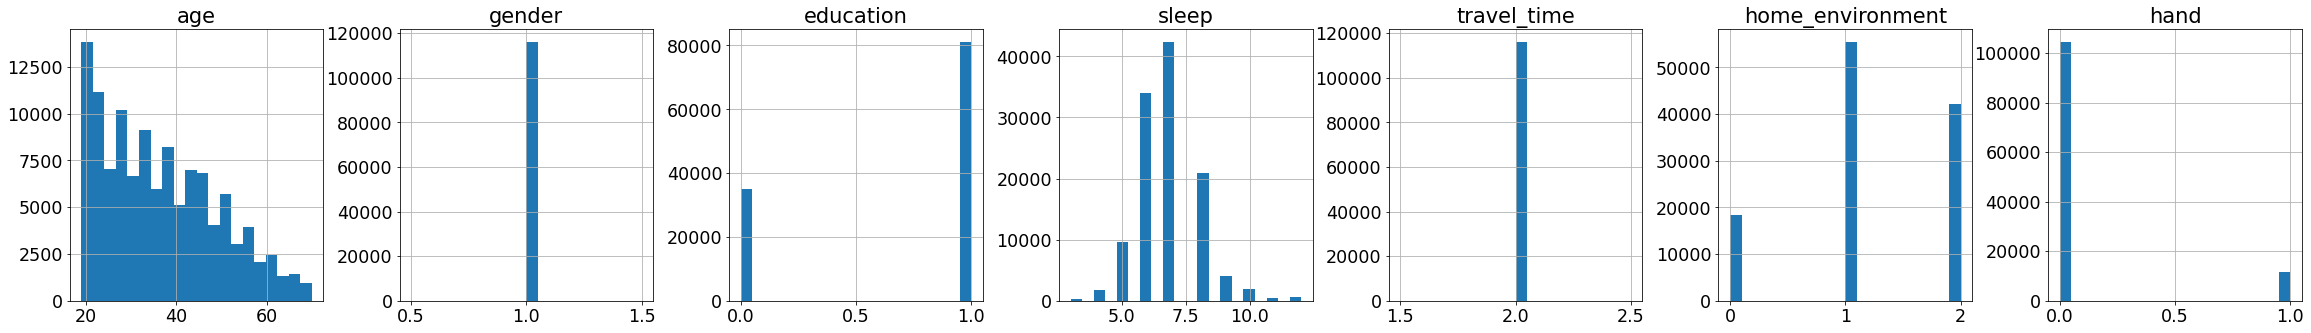

In [ ]:
plt.rcParams['font.size'] = '17.5'


hist = df2_1.hist(column = ["age", "gender",  "education", "sleep", "travel_time", "home_environment", "hand"], bins=20, layout = (1, 7), figsize=(40,5))
#plt.xticks(fontsize=13)

#df.hist(column=["Test_1", "Test_2"]) 

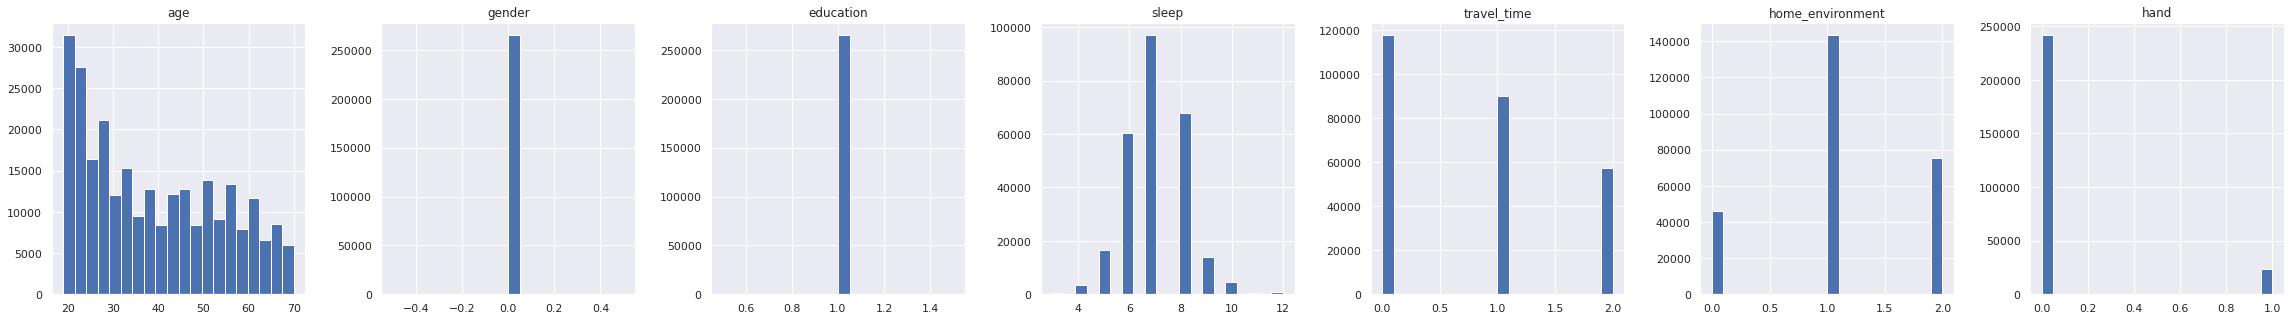

In [ ]:
#@title
hist = df2_2.hist(column = ["age", "gender", "education", "sleep", "travel_time", "home_environment", "hand"], bins=20, layout = (1, 7), figsize=(40,5))


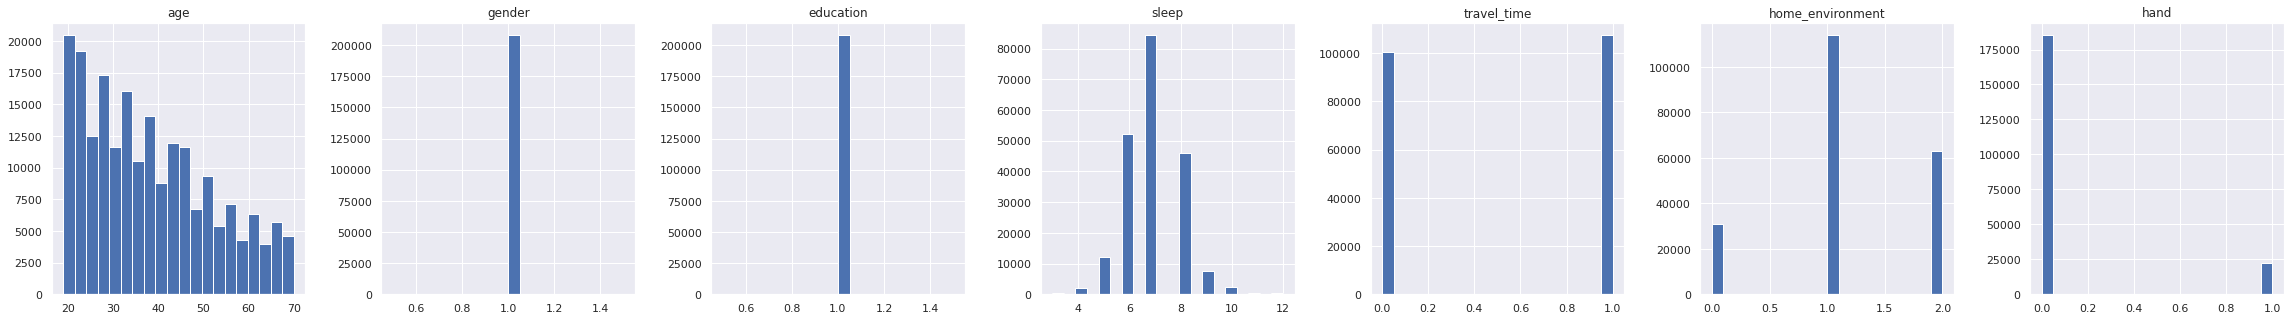

In [ ]:
#@title
hist = df2_3.hist(column = ["age", "gender", "education", "sleep", "travel_time", "home_environment", "hand"], bins=20, layout = (1, 7), figsize=(40,5))


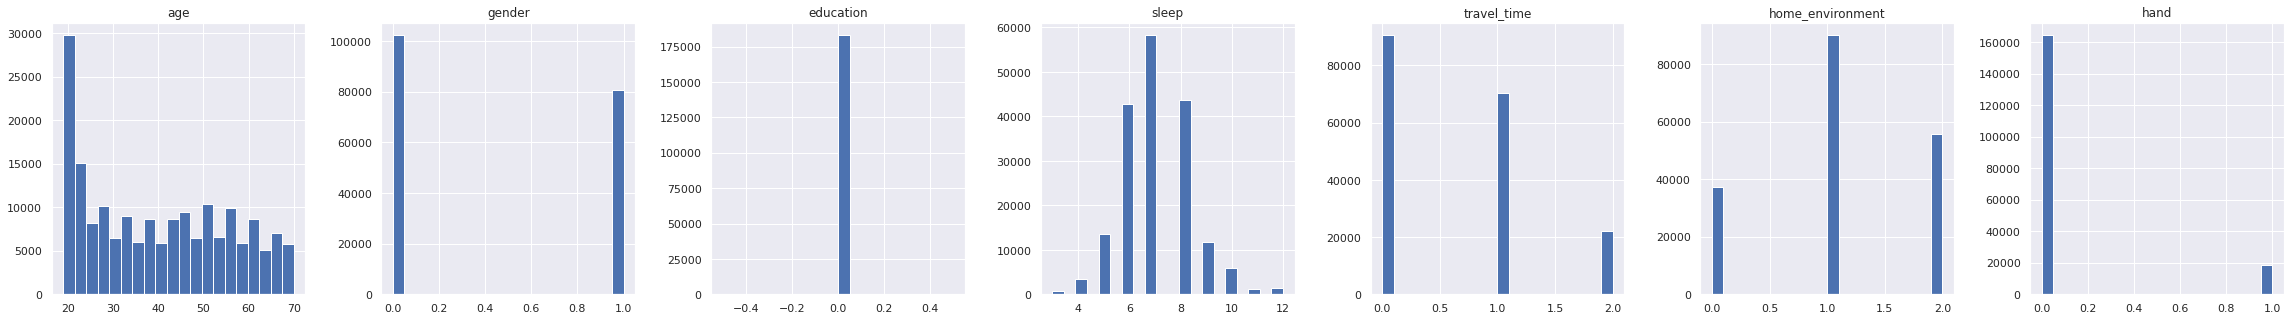

In [ ]:
#@title
hist = df2_4.hist(column = ["age", "gender", "education", "sleep", "travel_time", "home_environment", "hand"], bins=20, layout = (1, 7), figsize=(40,5))
